In [13]:
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import normalize
import pandas

def low_10( df ):
    return df.sort_values( by='total_score' ).head( 100 )

df = pandas.read_csv( 'benchmarks/nstruct100.sc', sep=r'\s+' ).dropna()
df.description = df.description.str[:-5]
df = df.groupby( 'description' ).apply( low_10 )
df.set_index( 'description', inplace=True )

train_set = pandas.read_csv( '../data/train_set.csv' )
train_set.set_index( 'mutant', inplace=True )

X = df.join( train_set ).dropna()
y = X.ix[:,'kcat':]
X = X.ix[:,:'expressed'] 

net = MultiTaskElasticNetCV()

params_grid = {
    'cv': [ 3, 4, 5, 10 ], 
    'l1_ratio': [ 0.001, 0.01, 0.1, 0.5 ], 
}

grid = GridSearchCV( net, params_grid )
grid.fit( X, y )

print grid.score( X, y )
print grid.best_params_

0.130886093398
{'l1_ratio': 0.001, 'cv': 4}


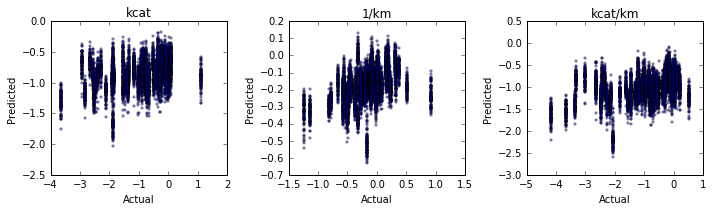

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt 

preds = [ grid.predict( X.iloc[i].reshape( 1, -1 ) ) for i in range( len( X ) ) ]
actuals = [ y.iloc[i] for i in range( len( X ) ) ]

fig, ax = plt.subplots( ncols=3, nrows=1, figsize=(10,3) )
for i in range( 3 ):
    xvalues = [ preds[n][0][i] for n in range( len( preds ) ) ]
    yvalues = [ actuals[n][i] for n in range( len( actuals ) ) ]
    ax[i].scatter( yvalues, xvalues, alpha=0.4, marker='.' )
    ax[i].set_xlabel( 'Actual' )
    ax[i].set_ylabel( 'Predicted' )
    ax[i].set_title( y.columns[i] )
    plt.tight_layout()

0.257571951999
{'l1_ratio': 0.001, 'cv': 10}


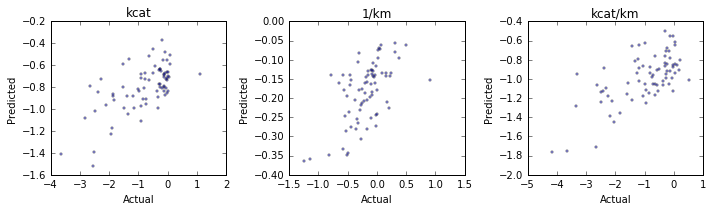

In [21]:
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import normalize
import pandas
%matplotlib inline
import matplotlib.pyplot as plt 

def low_10( df ):
    return df.sort( 'total_score' ).head( 100 )

df = pandas.read_csv( 'benchmarks/whole.sc', sep=r'\s+' ).dropna()
df.description = df.description.str[:-5]
df.set_index( 'description', inplace=True )
train_set = pandas.read_csv( '../data/train_set.csv' )
train_set.set_index( 'mutant', inplace=True )
X = df.join( train_set ).dropna()

y = X.ix[:,'kcat':]
X = X.ix[:,:'expressed'] 

net = MultiTaskElasticNetCV( selection='random', normalize=True )

params_grid = {
    'cv': [ 3, 4, 5, 10, 25, 50 ], 
    'l1_ratio': [ 0.001, 0.01, 0.1, 0.5 ], 
}

grid = GridSearchCV( net, params_grid )
grid.fit( X, y )

print grid.score( X, y )
print grid.best_params_

preds = [ grid.predict( X.iloc[i].reshape( 1, -1 ) ) for i in range( len( X ) ) ]
actuals = [ y.iloc[i] for i in range( len( X ) ) ]

fig, ax = plt.subplots( ncols=3, nrows=1, figsize=(10,3) )
for i in range( 3 ):
    xvalues = [ preds[n][0][i] for n in range( len( preds ) ) ]
    yvalues = [ actuals[n][i] for n in range( len( actuals ) ) ]
    ax[i].scatter( yvalues, xvalues, alpha=0.4, marker='.' )
    ax[i].set_xlabel( 'Actual' )
    ax[i].set_ylabel( 'Predicted' )
    ax[i].set_title( y.columns[i] )
    plt.tight_layout()

0.101911212131
{'l1_ratio': 0.001, 'cv': 5}


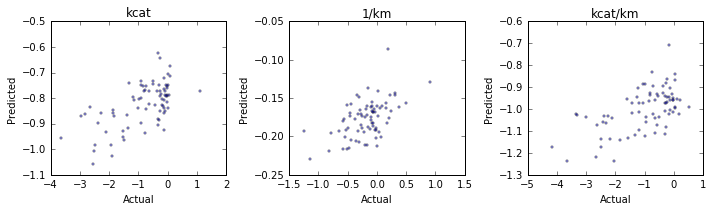

In [22]:
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import normalize
import pandas
%matplotlib inline
import matplotlib.pyplot as plt 

def low_10( df ):
    return df.sort( 'total_score' ).head( 100 )

df = pandas.read_csv( 'benchmarks/detect.sc', sep=r'\s+' ).dropna()
df.description = df.description.str[:-5]
df.set_index( 'description', inplace=True )
train_set = pandas.read_csv( '../data/train_set.csv' )
train_set.set_index( 'mutant', inplace=True )
X = df.join( train_set ).dropna()

y = X.ix[:,'kcat':]
X = X.ix[:,:'expressed'] 

net = MultiTaskElasticNetCV( selection='random', normalize=True )

params_grid = {
    'cv': [ 3, 4, 5, 10 ], 
    'l1_ratio': [ 0.001, 0.01, 0.1, 0.5 ], 
}

grid = GridSearchCV( net, params_grid )
grid.fit( X, y )

print grid.score( X, y )
print grid.best_params_

preds = [ grid.predict( X.iloc[i].reshape( 1, -1 ) ) for i in range( len( X ) ) ]
actuals = [ y.iloc[i] for i in range( len( X ) ) ]

fig, ax = plt.subplots( ncols=3, nrows=1, figsize=(10,3) )
for i in range( 3 ):
    xvalues = [ preds[n][0][i] for n in range( len( preds ) ) ]
    yvalues = [ actuals[n][i] for n in range( len( actuals ) ) ]
    ax[i].scatter( yvalues, xvalues, alpha=0.4, marker='.' )
    ax[i].set_xlabel( 'Actual' )
    ax[i].set_ylabel( 'Predicted' )
    ax[i].set_title( y.columns[i] )
    plt.tight_layout()